# 1. Data Exploration and Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load tha dataset with pandas
df=pd.read_csv("telecom.csv")

In [3]:
# for display data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Description of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
#finding null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#drop missing values from dataset
df.dropna()

#note :there are not any null values is dataset therfore it shows as it is values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


C:\Users\Darshan Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


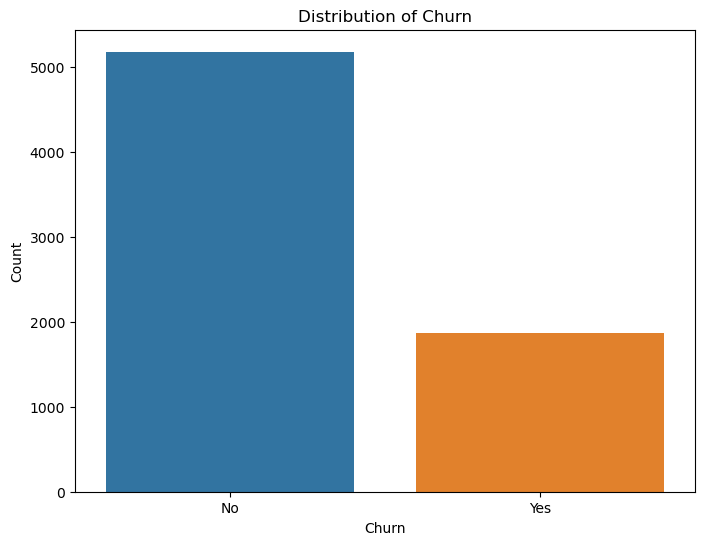

In [11]:
# Data Visualization of "Distribution of Churn"

# Churn refers to the number of customers who leave a service provider over a given period of time

plt.figure(figsize=(8,6))
sns.countplot(df['Churn'])
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# 2.Feature Engineering

In [12]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.Model Building

In [13]:
#Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Defining X (feature) and y(targeted var)
X=df_dummies.drop('Churn',axis=1)
y=df_dummies['Churn']

#splitting dataset into training and testing
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier instance
df_dummies_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
df_dummies_classifier.fit(X_train, y_train)

# Accuracy 
y_pred = df_dummies_classifier.predict(X_test)
df_accuracy =accuracy_score(y_test, y_pred)

# Hyperparameters using Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(df_dummies_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Decision Trees Accuracy:", df_accuracy)

Decision Trees Accuracy: 0.7707594038325053


In [16]:

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# for Hyperparameters we just need to put neighbour and it's value that shws in the code

knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("K Nearest Neighbors Accuracy:", knn_accuracy)

K Nearest Neighbors Accuracy: 0.7757274662881476


C:\Users\Darshan Rana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
# Neural Network using TensorFlow and Keras 
import tensorflow as tf
from tensorflow import keras

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Accuracy
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)

print("Neural Network Accuracy:", nn_accuracy)

Epoch 1/10
177/177 [==============================] - 4s 19ms/step - loss: 0.4533 - accuracy: 0.7863
Epoch 2/10
177/177 [==============================] - 3s 18ms/step - loss: 0.4067 - accuracy: 0.8159
Epoch 3/10
177/177 [==============================] - 3s 19ms/step - loss: 0.3749 - accuracy: 0.8310
Epoch 4/10
177/177 [==============================] - 3s 19ms/step - loss: 0.2726 - accuracy: 0.8976
Epoch 5/10
177/177 [==============================] - 3s 19ms/step - loss: 0.1139 - accuracy: 0.9814
Epoch 6/10
177/177 [==============================] - 3s 19ms/step - loss: 0.0257 - accuracy: 0.9988
Epoch 7/10
177/177 [==============================] - 3s 18ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 8/10
177/177 [==============================] - 3s 18ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/10
177/177 [==============================] - 3s 18ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/10
45/45 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy:

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(df_dummies_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Accuracy
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7963094393186657


# 4.Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

# Function to evaluate a model and return evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate the Decision Tree classifier
accuracy_df, precision_df, recall_df, f1_df = evaluate_model(df_dummies_classifier, X_test, y_test)

# Evaluate the K Nearest Neighbors (KNN) classifier
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(knn_classifier, X_test, y_test)

# Evaluate the Random Forest classifier
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(rf_classifier, X_test, y_test)

# Print the evaluation metrics
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_df:.2f}")
print(f"Precision: {precision_df:.2f}")
print(f"Recall: {recall_df:.2f}")
print(f"F1-score: {f1_df:.2f}")

# Identify the best-performing model based on a specific metric (e.g., F1-score)
best_model = "Decision Tree" if f1_df > f1_knn and f1_df > f1_rf else "KNN" if f1_knn > f1_rf else "Random Forest"
print(f"The best-performing model is:",best_model)


C:\Users\Darshan Rana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree Classifier:
Accuracy: 0.77
Precision: 0.58
Recall: 0.48
F1-score: 0.52
The best-performing model is: KNN


# 5.Transfer Learning (Bonus Task)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16  # Example pre-trained model

# Load a pre-trained model (e.g., VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Adjust input shape as needed

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a custom top layer for fine-tuning
top_model = keras.Sequential([
    Flatten(input_shape=base_model.output_shape[1:]),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification (Churn: Yes/No)
])

# Combine the base model and custom top model
model = keras.Model(inputs=base_model.input, outputs=top_model(base_model.output))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model on your telecom dataset
# You may need to preprocess your telecom dataset to match the input shape expected by the pre-trained model

# Example: Train the model on your telecom data (X_train, y_train)
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the fine-tuned model
# Example: Evaluate the model on your test data (X_test, y_test)
loss, accuracy = model.evaluate(X_test, y_test)

# Now, compare the performance of this fine-tuned model with the models built from scratch (Decision Tree, KNN, Random Forest).
#You can use the evaluation metrics discussed earlier to make comparisons.


Epoch 1/5


ValueError: in user code:

    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Darshan Rana\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 13618)


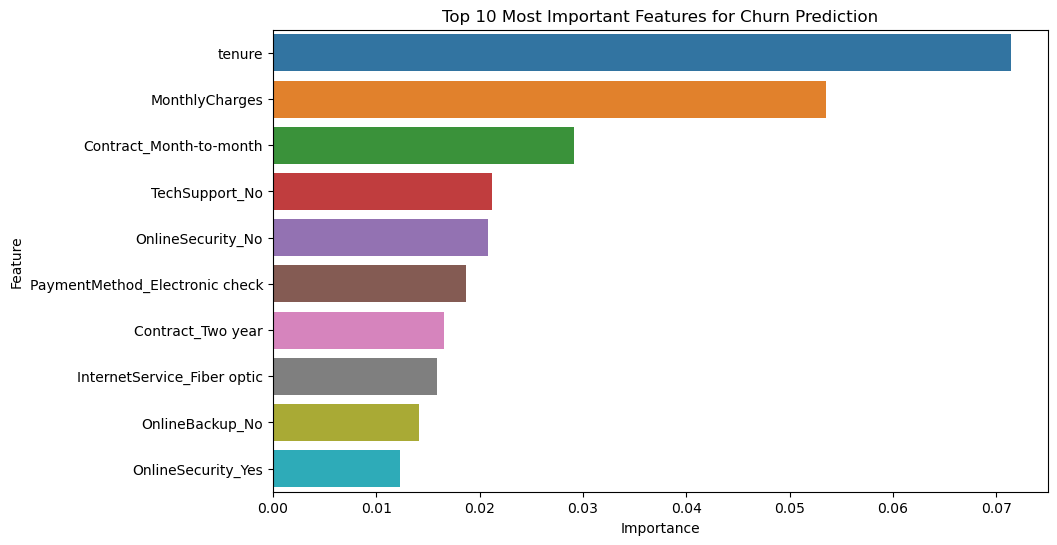

                             Feature  Importance
1                             tenure    0.071431
2                     MonthlyCharges    0.053518
7078         Contract_Month-to-month    0.029165
7069                  TechSupport_No    0.021203
7060               OnlineSecurity_No    0.020795
7085  PaymentMethod_Electronic check    0.018703
7080               Contract_Two year    0.016602
7058     InternetService_Fiber optic    0.015903
7063                 OnlineBackup_No    0.014142
7062              OnlineSecurity_Yes    0.012290
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [24]:

Discuss the features that are most indicative of churnimport matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest Classifier 
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N most important features
top_n = 10  
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Most Important Features for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the feature importance table
print(feature_importance_df.head(top_n))

# Generate a classification report to see model performance metrics
y_pred = rf_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print(classification_rep)
